Get the ratio of number of stars in RV over Gaia

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get distance
distance_g = 1/data_g["parallax"] # in kpc
distance_rv = 1/data_rv["parallax"] # in kpc

# get rid of stars with negative distance
mask_g = distance_g>0
data_g = data_g[mask_g]
mask_rv = distance_rv>0
data_rv = data_rv[mask_rv]

# get coordinates and magnitude of both gaia and rv
ra_g = data_g['ra'] #degree
dec_g = data_g['dec'] #degree
distance_g = 1/data_g["parallax"] # in kpc
gmag_g = data_g["phot_g_mean_mag"] # magnitude
color_g = data_g["bp_rp"] # magnitude
ra_rv = data_rv['ra'] #degree
dec_rv = data_rv['dec'] #degree
distance_rv = 1/data_rv["parallax"] # in kpc
gmag_rv = data_rv["phot_g_mean_mag"] # magnitude
color_rv = data_rv["bp_rp"] # magnitude

#set variables for histogram
ra_pixel = 1 # degree
dec_pixel = 1 # degree
ra_min = min(np.min(ra_g), np.min(ra_rv))
dec_min = min(np.min(dec_g), np.min(dec_rv))
ra_max = max(np.max(ra_g), np.max(ra_rv))
dec_max = max(np.max(dec_g), np.max(dec_rv))
bin_ra = (ra_max - ra_min)/ra_pixel
bin_dec = (dec_max - dec_min)/dec_pixel

c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'Ratio of Number in RV/Gaia')

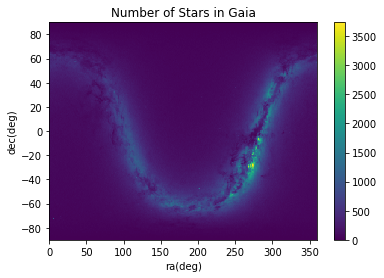

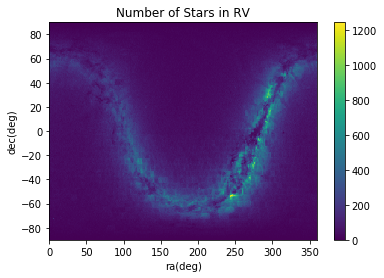

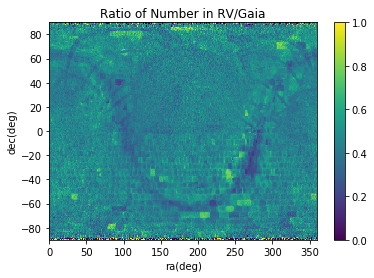

In [13]:
# get 2d histogram for gaia
plt.figure(1)
histogram_g, xedges, yedges, graph = plt.hist2d(ra_g, dec_g, 
                                                bins = (bin_ra, bin_dec),
                                                range = [[ra_min, ra_max],
                                                         [dec_min, dec_max]])
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Number of Stars in Gaia")
#plt.savefig("Number of Stars in Gaia.png")

# get 2d histogram for rv
plt.figure(2)
histogram_rv, xedges, yedges, graph = plt.hist2d(ra_rv, dec_rv, 
                                                bins = (bin_ra, bin_dec),
                                                range = [[ra_min, ra_max],
                                                         [dec_min, dec_max]])
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Number of Stars in RV")
#plt.savefig("Number of Stars in RV.png")

# define number of stars as a function of ra and dec
def number(ra, dec, histogram):
    ra_index = ((ra-ra_min)/ra_pixel).astype(int)-1
    dec_index = ((dec-dec_min)/dec_pixel).astype(int)-1
    if np.ndim(ra) == 1:
        result = []
        for i in range(np.size(ra_index)):
            result.append(histogram[ra_index[i]][dec_index[i]])
        return np.array(result)
    elif np.ndim(ra) == 2:
        result = []
        for i in range(np.shape(ra_index)[0]):
            row = []
            for j in range(np.shape(ra_index)[1]):
                row.append(histogram[ra_index[i][j]][dec_index[i][j]])
            result.append(row)
        return np.array(result)

# define the ratio of number density as a function of ra and dec
def ratio(ra, dec):
    return number(ra, dec, histogram_rv)/number(ra, dec, histogram_g)

# compute an array of ratio and plot
ra_linspace = np.linspace(ra_min, ra_max, bin_ra)
dec_linspace = np.linspace(dec_min, dec_max, bin_dec)
ra_v, dec_v = np.meshgrid(ra_linspace, dec_linspace)
z = ratio(ra_v, dec_v)
# change nan to zero
z = np.nan_to_num(z)
plt.figure(3)
#plt.pcolor(ra_v, dec_v, z, norm = LogNorm())
plt.pcolor(ra_v, dec_v, z)
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Ratio of Number in RV/Gaia")
#plt.savefig("Ratio of Number in RV Gaia.png")

Get the ra and dec of theoretical galactic plane

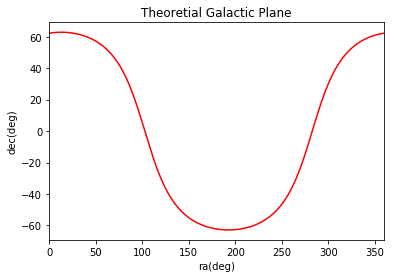

In [14]:
from astropy.coordinates import SkyCoord

galactic_longitudes = np.arange(start=0, stop=360, step=0.1)
galactic_latitudes = np.zeros(np.size(galactic_longitudes))
icrs = SkyCoord(galactic_longitudes, galactic_latitudes, unit="deg", frame="galactic").icrs
ra_plane = icrs.ra.degree
dec_plane = icrs.dec.degree
# sort to avoid error in plot
sort = np.argsort(ra_plane)
ra_plane = ra_plane[sort]
dec_plane = dec_plane[sort]

plt.figure(4)
plt.plot(ra_plane, dec_plane, c = "red")
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.xlim(0,360)
plt.title("Theoretial Galactic Plane")
plt.savefig("Theoretial Galactic Plane.png")

Plot theoretical galactic plane over selection ratio

Text(0.5,1,'Ratio of Number in RV/Gaia with Fitted Galactic Plane')

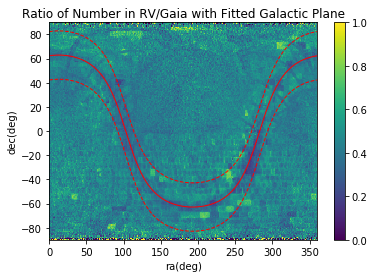

In [15]:
plt.figure(5)
plt.pcolor(ra_v, dec_v, z)
plt.plot(ra_plane, dec_plane, c = "red", linewidth = 1)
plt.plot(ra_plane, dec_plane+20., c = "red", linestyle = '--', linewidth = 1)
plt.plot(ra_plane, dec_plane-20.,c = "red", linestyle = '--', linewidth = 1)
plt.colorbar()
plt.xlim(0,360)
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Ratio of Number in RV/Gaia with Fitted Galactic Plane")
#plt.savefig("Ratio of Number in RV Gaia with Fitted Galactic Plane.png")

Text(0.5,1,'Ratio of Number in RV/Gaia with Fitted Galactic Plane(filled between)')

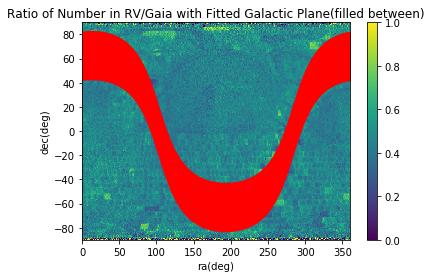

In [16]:
plt.figure(6)
plt.pcolor(ra_v, dec_v, z)
plt.fill_between(ra_plane, dec_plane-20., dec_plane+20., color= "red")
plt.colorbar()
plt.xlim(0,360)
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Ratio of Number in RV/Gaia with Fitted Galactic Plane(filled between)")
#plt.savefig("Ratio of Number in RV Gaia with Fitted Galactic Plane(filled between).png")

In [90]:
ra_plane_pixel = 0.21
def selection(ra, dec, parallax):
    ra_index = (ra/ra_plane_pixel).astype(int)-1
    mask = (dec < dec_plane[ra_index] + 20.) & (dec > dec_plane[ra_index] - 20.)
    out = np.empty(np.shape(ra)[0])
    out[mask] = selection_galactic_plane(parallax[mask])
    out[~mask] = selection_elsewhere(parallax[~mask])
    return out

def selection_galactic_plane(parallax):
    return np.full(np.size(parallax), True)

def selection_elsewhere(parallax):
    return np.full(np.size(parallax), False)

In [91]:
rand = np.random.uniform(size = (100,3), low = (0.,-90,0), high = (360.,90,1))
#rand = np.array([[150,-50,0],[160,-60,0],[200,-20,1]])
filtered = selection(*rand.T)
filtered = filtered.astype(bool)

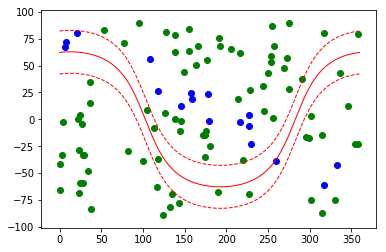

In [92]:
plt.figure()
plt.scatter(rand[filtered][:,0], rand[filtered][:,1], color = "blue")
plt.plot(ra_plane, dec_plane, c = "red", linewidth = 1)
plt.plot(ra_plane, dec_plane+20., c = "red", linestyle = '--', linewidth = 1)
plt.plot(ra_plane, dec_plane-20.,c = "red", linestyle = '--', linewidth = 1)
plt.scatter(rand[~filtered][:,0], rand[~filtered][:,1], color = "green")

21.686216796627278